# __Loan Status Prediction__
### __Uses:__ Logistic Regression Model

*__Made by:__ Sebastián Cervantes ^^*

## **Work flow:**
 * Loan Data (Kaggle)
 * Data pre processing & Data visualization
 * Training test split
 * Support vectro Machine
 * Evaluation
 
## **Considerations**
 * N = denied
 * Y = aproved

### __Importing dependencies__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### __Data preprocessing__

In [2]:
loan_dataset = pd.read_csv('loan_data.csv')

In [5]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_dataset.shape

(614, 13)

### __Pre-processing__

In [7]:
#Statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Eliminating rows of data with missing values is one way to afford them
loan_dataset = loan_dataset.dropna()
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
# How 3+ is not a valid data (character + number) we will cahnge it by 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### __Data visualization__

<AxesSubplot:xlabel='Education', ylabel='count'>

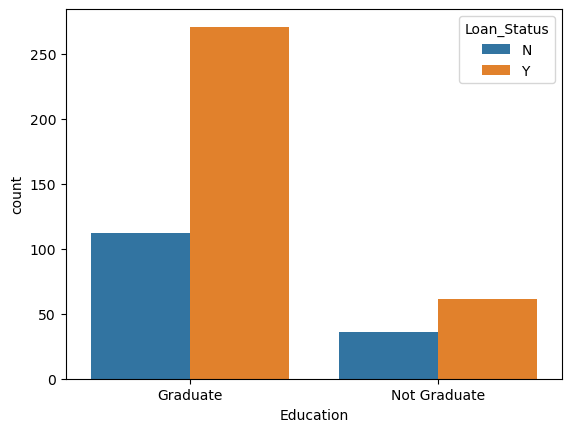

In [14]:
# Education & Loan Status
sns.countplot(x='Education', hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

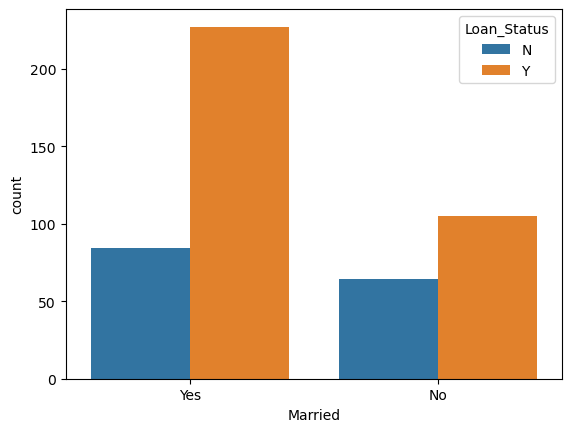

In [15]:
# Maritial Status & Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [17]:
# label encoding ------> Categorical data to numerical data
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,Y


### __Training test split__

In [21]:
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


### **Support Vector Machine**

In [24]:
classifier = svm.SVC(kernel='linear')

In [26]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### **Evaluation**

In [27]:
# Accuraccy score
X_train_prediction = classifier.predict(X_train)
training_score = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of training dat: ',training_score)

Accuracy of training dat:  0.7786458333333334


In [28]:
# Accuraccy score test data
X_test_prediction = classifier.predict(X_test)
test_score = accuracy_score(X_test_prediction, Y_test)
print('Accuraccy of testing data: ', test_score)

Accuraccy of testing data:  0.8125
